# ER131 Final Project (replace this with your project title)
Fall 2020

In this cell, give an alphabetical (by last name) list of student group members.  Beside each student's name, provide a description of each student's contribution to the project.

**Longmate, Julia**: [contribution] <br>
**Murayama, Hikari**: [contribution] <br>
**Sims, Michelle**: [contribution] <br>
**Worsham, Marshall**: [contribution] <br>

## Basic Project Requirements (delete this markdown cell in your final submission)

**How to use this notebook**:  This notebook is the template for your semester project.  Each markdown cell provides instructions on what to do in order to complete a successful project.  The cell you're reading right now is the only one you can delete from what you eventually hand in.  For the other cells:
1. You may replace the instructions in each cell with your own work but do not edit the cell titles (with the exception of the project title, above).  
2. Follow the instructions in each section carefully.  For some sections you will enter only markdown text in the existing cells. For other sections, you'll accompany the markdown cells with additional code cells, and perhaps more markdown, before moving on to the next section.  

**Grading**.  You'll see point allocations listed in each of the section titles below.  In addition, there are other categories for points: 
1. Visualization (10 points).  Plots should be well organized, legible, labelled, and well-suited for the question they are being used to answer or explore.  
2. Clarity (5 points). Note that clarity also supports points elsewhere, because if we can't understand what you're explaining, we'll assume you didn't understand what you were doing and give points accordingly!  

For each Section or Category, we will give points according to the following percentage scale:
1. More than 90%:  work that is free of anything but superficial mistakes, and demonstrates creativity and / or a very deep understanding of what you are doing.
2. 80-90%: work without fundamental errors and demonstrates a basic understanding of what you're doing.
3. 60-80%: work with fundamental flaws in the analysis and / or conveys that you do not understand the basics of the work you are trying to do.
4. Below 60%: Work that is severely lacking or incomplete.  

Note that we distinguish *mistakes* from *"my idea didn't work"*.  Sometimes you don't know if you can actually do the thing you're trying to do and as you dig in you find that you can't.  That doesn't necessarily mean you made a mistake; it might just mean you needed more information.  We'll still give high marks to ambitious projects that "fail" at their stated objective, as long as that objective was clear and you demonstrate an understanding of what you were doing and why it didn't work.

**Number of prediction questions:**  The number of prediction questions must be greater than or equal to the number of students in the team minus one.  (A 4 person team would need to explore 4-1 = 3 questions.)  Questions should be related, but have distinct work efforts, interpretation and analysis. An example: for land use regression, you could have a core prediction question (what is pollution concentration on a fine spatial scale), a supporting question that explore how the degree of spatial aggregation influences prediction quality, plus a prediction model that explores *temporal* prediction at one point in space.  There is a lot of flexibility here; if you have any doubt about whether your questions are distinct, consult with the instructors.

**Data requirements**:  Projects must use data from a minimum of $1+N_s$ different sources, where $N_s$ is the number of students in the group.  You should merge at least two data sets. </font>

**Advice on Project Topics**:  We want you to do a project that relates to energy and environment topics.  

**Suggested data sets**: If you choose not to work on a client projets, here are some ideas for data starting points. You can definitely bring your own data to the table!
1. [Purple Air](https://www.purpleair.com) Instructions on how to download PurpleAir data are [here](https://docs.google.com/document/d/15ijz94dXJ-YAZLi9iZ_RaBwrZ4KtYeCy08goGBwnbCU/edit).
2. California Enviroscreen database.  Available [here].(https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30) 
3. Several data sets available from the UC Irvine machine learning library:
    1. [Forest Fires](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)
    4. [Climate](https://archive.ics.uci.edu/ml/datasets/Greenhouse+Gas+Observing+Network)
    5. [Ozone](https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection)
4. California Solar Initiative data (installed rooftop solar systems).  Available [here](https://www.californiasolarstatistics.ca.gov/data_downloads/).
5. World Bank Open Data, available [here](https://data.worldbank.org).
6. California ISO monitored emissions data, [here](http://www.caiso.com/TodaysOutlook/Pages/Emissions.aspx).
7. Energy Information Administration Residential Energy Consumption Survey, [here] (https://www.eia.gov/consumption/residential/data/2015/) 

In [34]:
#Import modules
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import LinearRegression, Lasso, RidgeCV,LassoCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm

## Abstract (5 points)
Although this section comes first, you'll write it last.  It should be a ~250 word summary of your project.  1/3rd of the abstract should provide background, 1/3rd should explain what you did, and 1/3rd should explain what you learned.

## Project Background (5 points)
In this section you will describe relevant background for your project.  It should give enough information that a non-expert can understand in detail the history and / or context of the system or setting you wish to study, the need for quantitative analysis, and, broadly, what impact a quantitative analyses could have on the system.  Shoot for 500 words here.

## Project Objective (5 points)
In this section you will pose the central objective or objectives for your semester project.  Objectives should be extremely clear, well-defined and clearly cast as forecasting problems.  

Some example questions: 
1. *"The purpose of this project is to train and evaluate different models to predict soil heavy metal contamination levels across the state of Louisiana, using a variety of features drawn from EPA, the US Census, and NAICS databases."* or
2. *"The purpose of this project is to train and evaluate different models to predict 1-minute generation from a UCSD solar PV site, up to 2 hours into the future, using historical data as well as basic weather forecast variables.*" or
3. *"The purpose of this project is to forecast daily emergency room visits for cardiac problems in 4 major US cities, using a majority of features including air quality forecasts, weather forecasts and seasonal variables."*

You should reflect here on why it's important to answer these questions.  In most cases this will mean that you'll frame the answers to your questions as informing one or more *resource allocation* problems.  If you have done a good job of providing project background (in the cell above) then this reflection will be short and easy to write.

**Comment on novelty:** You may find it hard to identify a project question that has *never* been answered before.  It's ok if you take inspiration from existing analyses.  However you shouldn't exactly reproduce someone else's analysis.  If you take inspiration from another analyses, you should still use different models, different data, and so on.

## Input Data Description (5 points)
Here you will provide an initial description of your data sets, including:
1. The origins of your data.  Where did you get the data?  How were the data collected from the original sources?
2. The structure, granularity, scope, temporality and faithfulness (SGSTF) of your data.  To discuss these attributes you should load the data into one or more data frames (so you'll start building code cells for the first time).  At a minimum, use some basic methods (`.head`, `.loc`, and so on) to provide support for the descriptions you provide for SGSTF. 

[Chapter 5](https://www.textbook.ds100.org/ch/05/eda_intro.html) of the DS100 textbook might be helpful for you in this section.

TO DO: INPUT DESCRIPTION + (Photos of?) BASIC METHODS `.head(), .loc` (where possible)

### Y variable

#### AVIRIS-NG mean methane concentration
[Marshall]

### Features

#### TROPOMI Satellite Measurements of CH4, O3, and SO2
[Hikari]

#### VISTA-CA Methane Emitters
[Marshall]

#### USGS National Land Cover Data
[Michelle]

#### US Information Administration Natural Gas Pipeline
[Julia]

#### EPA Air Now Measurements of PM2.5, Ozone, and NOx
[Hikari]

#### USDA(?) Cow Density Data
[Julia]

## Data Cleaning (10 points)
In this section you will walk through the data cleaning and merging process.  Explain how you make decisions to clean and merge the data.  Explain how you convince yourself that the data don't contain problems that will limit your ability to produce a meaningful analysis from them.  

[Chapter 4](https://www.textbook.ds100.org/ch/04/cleaning_intro.html) of the DS100 textbook might be helpful to you in this section.  

TO DO: INPUT DESCRIPTION OF DATA CLEANING + ANY CODE(? - maybe just merged dataframe at the end?)

#### AVIRIS-NG mean methane concentration
[Marshall]

#### TROPOMI Satellite Measurements of CH4, O3, and SO2
[Hikari]

#### VISTA-CA Emitter Locations 
[Marshall]

#### VISTA-CA Emitter Type
[Michelle]

#### USGS National Land Cover Data
[Michelle]

#### US Information Administration Natural Gas Pipeline
[Julia]

#### EPA Air Now Measurements of PM2.5, Ozone, and NOx
[Hikari]

#### USDA(?) Cow Density Data
[Julia]

## Data Summary and Exploratory Data Analysis (10 points)

In this section you should provide a tour through some of the basic trends and patterns in your data.  This includes providing initial plots to summarize the data, such as box plots, histograms, trends over time, scatter plots relating one variable or another.  

[Chapter 6](https://www.textbook.ds100.org/ch/06/viz_intro.html) of the DS100 textbook might be helpful for providing ideas for visualizations that describe your data.  

Ideas for visualizations to include:
1. Scatter plot relationship between each feature and our y variable
2. One-two summary visualizations for each feature?
3. Scatter plot relationship between specific variables
4. Correlation plot

## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches for each prediction question, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?). 
1. Carefully describe your cross validation and model selection process.  You should partition your data into training and testing data sets.  The training data set is what you use for cross-validation (i.e. you sample from within it to create folds, etc.).  The testing data set is held to the very end of your efforts, and used to compare qualitatively different models (e.g. OLS vs random forests).
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to write functions allow you to avoid doing things over and over, and that make your code more succinct and readable. 

### Question 1: Predicting air quality measurements near methane emitter sources 
##### **To use as a feature for prediction questions 2 & 3**
We'd like to use air quality as a feature in our model; however, we don't have air quality measurements at the exact location of our emitter points. Therefore, we'll use K Nearest Neighbors to predict air quality at our emitter points, and use these predictions as a feature for our main prediction questions. 

#### Model 1: K Nearest Neighbors [Michelle]
First, we'll try K Nearest Neighbors (KNN) to predict the average air quality measurements for XX timeframe at each of our emitter points. 

### Question 2: Predicting ground-level methane emissions throughout California
TO DO: Explanation of approach. Why regression. 

<font color='purple'><b>With the lack of facility level measurements, air monitor network sensors, and regulation of methane in the United States, it was imperative to develop a model that could predict ground measurements of $CH_4$. Using studies like the Novotony et al. (2011) as a basis, we decided to go about this prediction using OLS, Lasso, and Ridge.</b></font>

#### Overview of our dataset
TO DO: Provide overview of all our features, explain anything that requires explanation if it hasn't already been justified in prior sections (buffers, averaging time/space for features, timeframe used, etc.)

NOTE: How do we want to handle trying out different versions of our features, such as nonlinear versions of our features, etc... if we want to delve into this at all? Maybe we wait until we do some exploratory analysis on the data to see if there are any clearly nonlinear relationships?

<font color='purple'><b>I went with the assumption we'd explain all of the vars in the above sections.
    <br> I agree doing some type of EDA on the nonlinear relationships, maybe we can ask Julia.</b></font>

In [2]:
gdf = gpd.read_file('output/target_and_features.geojson')

First let's double check our geodataframe.

In [3]:
gdf.shape

(48386, 65)

In [4]:
#First, we'll look at the dataframe that contains the data we'll use to create our model.
gdf.head()

,Vista_ID,AVIRIS_CH4_median_ppmm,AVIRIS_CH4_median_date,AVIRIS_CH4_pxcount,CH4_Mass_kg,ng_pipelength_2,ng_pipelength_1000,ng_pipelength_5000,ng_pipelength_10000,ng_pipelength_50000,...,EmitterType_Refinery,EmitterType_Wastewater.Treatment.Plant,NearestNeighbor,NN_Distance_m,NN_Type,aviris_month,tropomi_no2_mean,tropomi_o3_mean,tropomi_so2_mean,geometry
0,DAF001852,152.0039,2016-09-11,835.7500,0.0001,6392.1007,7391.6466,16539.2553,57707.9384,667538.8408,...,0,0,DAF000658,2466.0455,Dairy,9,0.0,2.7501,0.3199,"MULTIPOLYGON (((-82488.739 -16790.579, -82489...."
1,DAF001876,111.8814,2016-09-12,1670.0000,0.0001,85884.6586,94127.2287,127492.1839,170899.8068,842878.1810,...,0,0,COM000219,781.9825,Natural Gas Station,9,0.0,2.7094,0.4187,"MULTIPOLYGON (((260247.391 -342212.585, 260246..."
2,DAF001759,244.1223,2016-09-12,3346.0000,0.0002,18873.8279,21161.2918,29954.3051,43939.1783,334243.8826,...,0,0,DAF000910,4638.2693,Dairy,9,0.0,2.6972,0.3413,"MULTIPOLYGON (((61647.033 -234595.348, 61646.1..."
3,DAF001767,112.7884,2016-09-12,1114.6667,0.0001,0.0000,0.0000,0.0000,6753.5702,336951.9840,...,0,0,OGW166989,1181.9761,Oil and Gas Well,9,0.0,2.6981,0.3361,"MULTIPOLYGON (((45304.763 -224578.476, 45303.9..."
4,DAF001776,105.4107,2016-09-12,1216.2727,0.0001,0.0000,0.0000,0.0000,0.0000,264800.5901,...,0,0,FDL000024,1901.1757,Feed Lot,9,0.0,2.7004,0.3429,"MULTIPOLYGON (((39551.942 -203816.734, 39551.1..."


In [5]:
gdf.columns

Index(['Vista_ID', 'AVIRIS_CH4_median_ppmm', 'AVIRIS_CH4_median_date',
       'AVIRIS_CH4_pxcount', 'CH4_Mass_kg', 'ng_pipelength_2',
       'ng_pipelength_1000', 'ng_pipelength_5000', 'ng_pipelength_10000',
       'ng_pipelength_50000', 'weighted_cow_density', 'LULC_open_water_perc',
       'LULC_ice_snow_perc', 'LULC_developed_open_space_perc',
       'LULC_developed_low_int_perc', 'LULC_developed_med_int_perc',
       'LULC_developed_high_int_perc', 'LULC_barren_land_perc',
       'LULC_deciduous_forest_perc', 'LULC_evergreen_forest_perc',
       'LULC_mixed_forest_perc', 'LULC_shrub_scrub_perc',
       'LULC_grassland_herbaceous_perc', 'LULC_pasture_hay_perc',
       'LULC_cultivated_crops_perc', 'LULC_woody_wetlands_perc',
       'LULC_emergent_herbaceous_wetlands_perc', 'LULC_total_perc',
       'LULC_majority_class', 'LULC_Barren.Land', 'LULC_Cultivated.Crops',
       'LULC_Dev..Low.Int', 'LULC_Dev..Med.Int', 'LULC_Dev..Open.Space',
       'LULC_Evergreen.Forest', 'LULC_Grasslan

Before we dive into dividing up our data into features and our y variable, let's double check our variables like looking at our summary statistics.

In [6]:
columns_of_interest = np.setdiff1d(list(gdf.columns),['Latitude','Longitude','Vista_IPCC', 'Vista_Name', 'Vista_SType', 'Vista_ID', 'Source','geometry'])

for column in columns_of_interest:
    print(gdf[column].describe())

count          48382
unique            68
top       2017-10-06
freq            6814
Name: AVIRIS_CH4_median_date, dtype: object
count    48413.000000
mean       156.692061
std         64.211611
min        100.001800
25%        118.497400
50%        139.908400
75%        175.615100
max       2057.326500
Name: AVIRIS_CH4_median_ppmm, dtype: float64
count    4.841300e+04
mean     1.633705e+03
std      1.547791e+04
min      1.989200e-06
25%      6.961667e+02
50%      1.026206e+03
75%      1.383000e+03
max      1.956112e+06
Name: AVIRIS_CH4_pxcount, dtype: float64
count    4.841300e+04
mean     1.617150e+03
std      1.851532e+04
min      0.000000e+00
25%      6.361235e+02
50%      9.344105e+02
75%      1.395415e+03
max      3.055426e+06
Name: CH4_Mass_kg, dtype: float64
count    48413.000000
mean         0.000516
std          0.022719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: EmitterType_Composting.Sites, dtype: float

count                48413
unique                  15
top       Oil and Gas Well
freq                 47139
Name: NN_Type, dtype: object
count         48413
unique        36610
top       CNG000146
freq             66
Name: NearestNeighbor, dtype: object
count    48382.000000
mean         8.718139
std          1.328866
min          3.000000
25%          9.000000
50%          9.000000
75%          9.000000
max         11.000000
Name: aviris_month, dtype: float64
count     48413.000000
mean      62880.210091
std       44577.366253
min           0.000000
25%       18249.004700
50%       68452.837400
75%      103691.395400
max      322848.647800
Name: ng_pipelength_1000, dtype: float64
count     48413.000000
mean     149830.581546
std       65693.815608
min           0.000000
25%       87780.677400
50%      145750.147900
75%      207453.566300
max      488252.893300
Name: ng_pipelength_10000, dtype: float64
count     48413.000000
mean      55770.261470
std       40531.625013
min           0

Most of our variables aren't objects, but a few are. We'll make sure to note which ones these are and then exclude them from being features.

In [18]:
gdf.select_dtypes(include='object').head()

,Vista_ID,AVIRIS_CH4_median_date,LULC_majority_class,NearestNeighbor,NN_Type
0,DAF001852,2016-09-11,Cultivated Crops,DAF000658,Dairy
1,DAF001876,2016-09-12,Shrub Scrub,COM000219,Natural Gas Station
2,DAF001759,2016-09-12,Cultivated Crops,DAF000910,Dairy
3,DAF001767,2016-09-12,Cultivated Crops,OGW166989,Oil and Gas Well
4,DAF001776,2016-09-12,Cultivated Crops,FDL000024,Feed Lot


Our data is comprised of features from various sources, these can be categorized on whether they are categorical or quantitative, which you will find in the following table.

 <font color='purple'><b>Make sure to add the KNN vars</b></font>

| Y Variable | Quantitative Feature | Categorical Feature |
| --- | --- | --- |
|`CH4_Mass_kg`|`AVIRIS_CH4_median_ppmm`|`LULC_Barren.Land`|
||`ng_pipelength_2`|`LULC_Cultivated.Crops`|
||`ng_pipelength_1000`|`LULC_Dev..Low.Int`|
||`ng_pipelength_5000`|`LULC_Dev..Med.Int`|
||`ng_pipelength_10000`|`LULC_Dev..Open.Space`|
||`ng_pipelength_50000`|`LULC_Evergreen.Forest`|
||`weighted_cow_density`|`LULC_Grassland`|
||`LULC_open_water_perc`|`LULC_Herbaceous.Wetlands`|
||`LULC_ice_snow_perc`|`LULC_Mixed.Forest`|
||`LULC_developed_open_space_perc`|`LULC_Open.Water`|
||`LULC_developed_low_int_perc`|`LULC_Pasture.Hay`|
||`LULC_developed_med_int_perc`|`LULC_Shrub.Scrub`|
||`LULC_developed_high_int_perc`|`EmitterType_Composting.Sites`|
||`LULC_barren_land_perc`|`EmitterType_Compressed.Natural.Gas.Fueling.Station`|
||`LULC_deciduous_forest_perc`|`EmitterType_Dairy`|
||`LULC_evergreen_forest_perc`|`EmitterType_Digester`|
||`LULC_mixed_forest_perc`|`EmitterType_Feed.Lot`|
||`LULC_shrub_scrub_perc`|`EmitterType_Landfill`|
||`LULC_grassland_herbaceous_perc`|`EmitterType_Liquefied.Natural.Gas.Fueling.Station`|
||`LULC_pasture_hay_perc`|`EmitterType_Natural.Gas.Processing.Plants`|
||`LULC_cultivated_crops_perc`|`EmitterType_Natural.Gas.Station`|
||`LULC_woody_wetlands_perc`|`EmitterType_Natural.Gas.Storage.Field`|
||`LULC_emergent_herbaceous_wetlands_perc`|`EmitterType_Oil.and.Gas.Facility.Boundary`|
||`LULC_total_perc`|`EmitterType_Oil.and.Gas.Field.Boundary`|
||`NN_Distance_m`|`EmitterType_Oil.and.Gas.Well`|
||`tropomi_no2_mean`|`EmitterType_Power.Plant`|
||`tropomi_o3_mean`|`EmitterType_Refinery`|
||`tropomi_so2_mean`|`EmitterType_Wastewater.Treatment.Plant`|

We'll double check if any of our rows have missing values.

In [6]:
np.sum(gdf.isna(),axis=1).value_counts()

0    48382
1        4
dtype: int64

It seems that the maximum value of missing values for a single row is 1. Let's see what variable may be the root of this.

In [8]:
np.sum(gdf.isna(),axis=0).sort_values(ascending=False)[:10]

AVIRIS_CH4_pxcount                        4
geometry                                  0
LULC_developed_high_int_perc              0
LULC_Barren.Land                          0
LULC_majority_class                       0
LULC_total_perc                           0
LULC_emergent_herbaceous_wetlands_perc    0
LULC_woody_wetlands_perc                  0
LULC_cultivated_crops_perc                0
LULC_pasture_hay_perc                     0
dtype: int64

Since the pixel count is not a feature, we can ignore this and say that our data is complete to conduct our prediction.

#### Step 1: Train/Test Split

We'll first split our data into training (80%) and testing data (20%). 
The testing data will be used to evaluate how each our models perform.

In [23]:
#We'll need to create a dataframe of our X variables (features), and our y variable
features = np.setdiff1d(list(gdf.columns),
                        ['Vista_ID', 'AVIRIS_CH4_median_date','AVIRIS_CH4_pxcount', 
                         'CH4_Mass_kg','LULC_majority_class','NearestNeighbor',
                         'NN_Type','aviris_month','geometry'])

X = gdf[features]
Y = gdf['CH4_Mass_kg']

In [24]:
#Create train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15)

Standardization is an important step in using Ridge and Lasso models so that we can penalize large range coefficients to make sure none of our features dominate our results.

In [25]:
#Standardize features
scalar = StandardScaler()
scalar.fit(X)
X_std = scalar.transform(X)

In [27]:
#Create train/test split with standardized features
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, Y, test_size = 0.2, random_state = 15)



We will use `X_train` and `y_train` to fit each of our models in the sections below, and `X_test` and `y_test` to compare between models once we have fit the parameters and hyperparameters of each model. 

#### Model 1: Ordinary Least Squares Regression
To begin, we'll use Ordinary Least Squares Linear regression.

We'll start by using `statsmodels` to fit the model on our training data, as this package provides more detailed statistical information about linear regression models. This will allow us to examine statistics such as R-squared and the P-value for each of our coefficients. 

We'll then run the model in `scikit learn` on both our testing and training data. 

In [54]:
#NOTE: MAKE SURE ONE DUMMY VARIABLE FOR EACH SET IS DROPPED, OTHERWISE MODEL RESULTS BETWEEN statsmodels and 
#scikit learn will not be the same. 

#For statsmodels, we need to include a column of one's to X so that it can fit an intercept. We'll add this column to 
# our training data to run the model. 
X_stats = sm.add_constant(X_train)

#Fit OLS regression
sm_model = sm.OLS(y_train, X_stats)
results = sm_model.fit()
results_summary = results.summary()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CH4_Mass_kg   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2948.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:38   Log-Likelihood:             3.6171e+05
No. Observations:               38708   AIC:                        -7.233e+05
Df Residuals:                   38660   BIC:                        -7.229e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
AVIRIS_CH4_median_ppmm                                6.2e-07   1.69e-09    366.085      0.000    6.17e-07    6.23e-07
EmitterType_Composting.Sites                       -8.539e-05   5.71e-05     -1.496      0.135      -0.000    2.65e-05
EmitterType_Compressed.Natural.Gas.Fueling.Station -7.688e-05   5.69e-05     -1.352      0.176      -0.000    3.46e-05
EmitterType_Dairy                                  -8.498e-05   5.69e-05     -1.494      0.135      -0.000    2.65e-05
EmitterType_Digester                               -9.116e-05   5.73e-05     -1.590      0.112      -0.000    2.12e-05
EmitterType_Feed.Lot                               -8.148e-05   5.75e-05     -1.418      0.156      -0.000    3.11e-05
EmitterType_Landfill                               -8.262e-05    5.7e-05     -1.450      0.147      -0.000    2.91e-05
EmitterType_Liquefied.Natural.Gas.Fueling.Station  -8.544e-05   5.73e-05     -1.491      0.136      -0.000    2.69e-05
EmitterType_Natural.Gas.Processing.Plants          -7.829e-05   5.77e-05     -1.356      0.175      -0.000    3.49e-05
EmitterType_Natural.Gas.Station                    -8.406e-05   5.69e-05     -1.476      0.140      -0.000    2.75e-05
EmitterType_Natural.Gas.Storage.Field              -5.903e-05   5.87e-05     -1.006      0.314      -0.000     5.6e-05
EmitterType_Oil.and.Gas.Facility.Boundary          -7.908e-05   5.69e-05     -1.390      0.165      -0.000    3.24e-05
EmitterType_Oil.and.Gas.Field.Boundary             -8.299e-05    5.7e-05     -1.456      0.145      -0.000    2.87e-05
EmitterType_Oil.and.Gas.Well                       -7.898e-05   5.69e-05     -1.388      0.165      -0.000    3.25e-05
EmitterType_Power.Plant                            -8.299e-05    5.7e-05     -1.456      0.145      -0.000    2.87e-05
EmitterType_Refinery                               -8.573e-05   5.73e-05     -1.496      0.135      -0.000    2.66e-05
EmitterType_Wastewater.Treatment.Plant             -5.604e-05   5.77e-05     -0.971      0.332      -0.000    5.71e-05
LULC_Barren.Land                                    5.796e-17   4.57e-16      0.127      0.899   -8.37e-16    9.53e-16
LULC_Cultivated.Crops                                 -0.0002      0.000     -1.391      0.164      -0.000     7.4e-05
LULC_Dev..Low.Int                                     -0.0002      0.000     -1.505      0.132      -0.000    5.97e-05
LULC_Dev..Med.Int                                     -0.0002      0.000     -1.390      0.165      -0.000    7.42e-05
LULC_Dev..Open.Space                               -9.108e-16   8.35e-16     -1.091      0.275   -2.55e-15    7.25e-16
LULC_Evergreen.Forest                              -7.289e-17   6.08e-17     -1.199      0.231   -1.92e-16  

Overall, our model had a $R^2$ value of 0.782, showing that there is a potentially strong relationship between our model and the response variable. However, AIC (a metric used to assess the quality of our model with a small value being better) is pretty large, indicating that we probably have too many features and could benefit from doing a model selection.

Looking at the t-statistic, where larger values are more significant, in conjunction with p values (should be at around 0), variables such as `AVIRIS_CH4_median_ppmm` and `ng_pipelength_10000`seem to introduce the least error to the model.

Based off of these results we're skeptical about the significance of the following variables, since they include 0 within their 95% confidence interval:`LULC_Barren.Land`, `LULC_Dev..Open.Space`, `LULC_Evergreen.Forest`, `LULC_Herbaceous.Wetlands`, `LULC_Pasture.Hay`, `LULC_Shrub.Scrub`, `LULC_*_perc`, `NN_Distance_m`, `ng_pipelength_1000`, `ng_pipelength_10000`, `ng_pipelength_2`, `tropomi_no2_mean`, `tropomi_so2_mean`, `weighted_cow_density`. 




Let's compare these results with `scikit learn` to double check out work.

In [37]:
sk_model = linear_model.LinearRegression()
sk_fit = sk_model.fit(X_train,y_train)

print("Intercept:", sk_fit.intercept_)
# Coefficients
print("Coefficients:", sk_fit.coef_)

Intercept: -0.0015370075189571274
Coefficients: [ 6.20002029e-07 -5.69770052e-06  2.81319689e-06 -5.28559216e-06
 -1.14646655e-05 -1.77895571e-06 -2.91900688e-06 -5.74577225e-06
  1.40184315e-06 -4.36550231e-06  2.06674046e-05  6.18464708e-07
 -3.29509034e-06  7.13771977e-07 -3.28873441e-06 -6.03475116e-06
  2.36605076e-05 -2.76468166e-16  1.25044051e-06 -1.56396287e-05
  1.42555182e-06  4.38830829e-17 -3.46558448e-16  2.25900849e-07
 -1.89681170e-16  1.87584719e-05 -9.85659169e-07 -3.79511418e-16
 -5.03507717e-06  1.51545527e-03  1.54891149e-03  8.74424686e-04
  1.55477362e-03  1.53083896e-03  1.54218873e-03  1.54298399e-03
  1.55322568e-03  1.55557841e-03  1.54148830e-03 -4.88975180e-17
  1.64737274e-03  1.53823491e-03  1.89487917e-03  1.55505057e-03
  2.16840434e-19  1.46072929e-03  1.66714139e-09  4.69987753e-11
 -8.06785700e-11 -2.39433052e-11  5.16769400e-11  7.65409318e-12
 -9.03791792e-03  2.44726520e-06  8.20468830e-06 -4.68375078e-08]


Awesome! They look pretty similar.

Now, we'll fit the model in `scikit learn`, and evaluate how the model performs on the testing data.

In [30]:
#Create a function  that fits a linear regression model and returns the training and test MSE. 
def OLS(X_train, y_train, X_test, y_test):
    """ Fits an Ordinary Least Squares Linear regression on the training set of X and y,
    and finds the MSE of the training and test set. 
    Arguments:
        X_train: An ndarray containing the set of features used to train the model. 
        y_train: A list/array containing containing the set of response variable observations used to train the model.
        X_test: An ndarray containing the set of features used to test the model.
        y_test: A list/array containing the set of response variable observations used to test the model. 
    Returns:
        train_mse: the MSE for the training data
        test_mse: The MSE for the test data
        model_coef: The coefficients for the model
        """
    #Fit model
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    #Get training MSE
    train_mse = mean_squared_error(y_train, lm.predict(X_train))
    
    #Get test MSE
    test_mse = mean_squared_error(y_test, lm.predict(X_test))
    
    return train_mse, test_mse

Now, we can utilize our function to fit the model using Ordinary Least Squares Linear regression. 

In [32]:
ols_train_mse, ols_test_mse = OLS(X_train, y_train, X_test, y_test)
print("Training MSE: ", ols_train_mse)
print("Test MSE: ", ols_test_mse)

Training MSE:  4.475825149585838e-10
Test MSE:  4.384094108876127e-10


It seems that our MSE is relatively small. But since our AIC is so large in this verison of the OLS model we'll vary the number of features we use to see what will improve the quality of our model.

We'll figure out what variables we may want to add first by sorting it on the t and p statistics.

In [63]:
# Take our results summary table and make it a dataframe
results_as_html = results_summary.tables[1].as_html()
results_summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index()

# Get absolute t value
results_summary_df['t_abs'] = np.absolute(results_summary_df['t'])

# Sort by large t and small p
results_summary_df = results_summary_df.sort_values(by=['t_abs', 'P>|t|'], ascending=[False,True])
results_summary_df.head()

,index,coef,std err,t,P>|t|,[0.025,0.975],t_abs
0,AVIRIS_CH4_median_ppmm,6.200000e-07,1.690000e-09,366.085,0.000,6.170000e-07,6.230000e-07,366.085
48,ng_pipelength_10000,-8.068000e-11,1.040000e-11,-7.767,0.000,-1.010000e-10,-6.030000e-11,7.767
51,ng_pipelength_50000,7.654000e-12,1.760000e-12,4.341,0.000,4.200000e-12,1.110000e-11,4.341
50,ng_pipelength_5000,5.168000e-11,1.640000e-11,3.145,0.002,1.950000e-11,8.390000e-11,3.145
53,tropomi_o3_mean,2.447000e-06,1.140000e-06,2.143,0.032,2.090000e-07,4.690000e-06,2.143
55,weighted_cow_density,-4.684000e-08,2.670000e-08,-1.753,0.080,-9.920000e-08,5.530000e-09,1.753
42,LULC_pasture_hay_perc,1.900000e-03,1.000000e-03,1.728,0.084,-0.000000e+00,4.000000e-03,1.728
4,EmitterType_Digester,-9.116000e-05,5.730000e-05,-1.590,0.112,-0.000000e+00,2.120000e-05,1.590
24,LULC_Herbaceous.Wetlands,7.592000e-16,4.800000e-16,1.583,0.114,-1.810000e-16,1.700000e-15,1.583
46,NN_Distance_m,1.667000e-09,1.090000e-09,1.523,0.128,-4.780000e-10,3.810000e-09,1.523


In [74]:
# Sort variables in order we think they're important (important ones first)
vars_to_add = results_summary_df['index']

And then we'll compute AIC and the loglikelihood function.

In [75]:
def computeAIC(fit_model,k):
    llf = fit_model.llf # get likelihood
    AIC = 2*k - 2*llf # calculate AIC
    
    return AIC

In [76]:
AIC_results = []
llf_results = []

for i, var in enumerate(vars_to_add):
    X = X_train[vars_to_add[:i]]
    X2 = sm.add_constant(X)
    sm_model = sm.OLS(y_train, X2)
    results = sm_model.fit()
    
    llf_results.append(results.llf)
    AIC_results.append(computeAIC(results,i))

We can visualize our results:

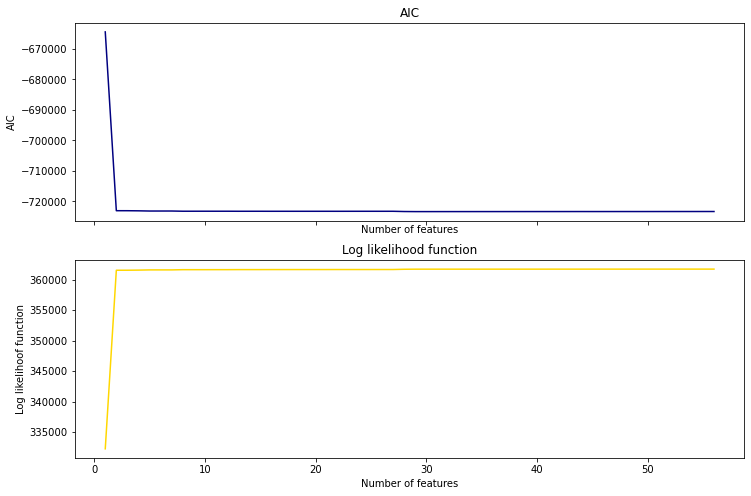

In [85]:
fig, (ax0,ax1) = plt.subplots(nrows=2, sharex=True, figsize = (12,8))

# AIC
ax0.plot(np.arange(1,len(vars_to_add)+1), AIC_results, color = 'navy')
ax0.set_xlabel('Number of features')
ax0.set_ylabel('AIC')
ax0.set_title('AIC')

# Log likelihood function
ax1.plot(np.arange(1,len(vars_to_add)+1), llf_results, color = 'gold')
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Log likelihoof function')
ax1.set_title('Log likelihood function')

plt.show()

In [123]:
print("Best model based on AIC: ", np.argmin(AIC_results))
print("Best model based on LLF: ", np.argmax(llf_results))

Best model based on AIC:  29
Best model based on LLF:  55


So if we choose our model based on a low AIC we would have the variables

In [131]:
print("Features for model  (based on AIC): \n", vars_to_add.iloc[:np.argmin(AIC_results)])

Features for model  (based on AIC): 
 0                                AVIRIS_CH4_median_ppmm
48                                  ng_pipelength_10000
51                                  ng_pipelength_50000
50                                   ng_pipelength_5000
53                                      tropomi_o3_mean
55                                 weighted_cow_density
42                                LULC_pasture_hay_perc
4                                  EmitterType_Digester
24                             LULC_Herbaceous.Wetlands
46                                        NN_Distance_m
19                                    LULC_Dev..Low.Int
40                               LULC_mixed_forest_perc
1                          EmitterType_Composting.Sites
15                                 EmitterType_Refinery
3                                     EmitterType_Dairy
7     EmitterType_Liquefied.Natural.Gas.Fueling.Station
9                       EmitterType_Natural.Gas.Station
12        

So we can re-run our model based on that to get our best quality model.

In [140]:
X_train[list(np.array(vars_to_add.iloc[:np.argmin(AIC_results)]))]

,AVIRIS_CH4_median_ppmm,ng_pipelength_10000,ng_pipelength_50000,ng_pipelength_5000,tropomi_o3_mean,weighted_cow_density,LULC_pasture_hay_perc,EmitterType_Digester,LULC_Herbaceous.Wetlands,NN_Distance_m,...,EmitterType_Landfill,LULC_Shrub.Scrub,EmitterType_Feed.Lot,LULC_developed_high_int_perc,LULC_evergreen_forest_perc,LULC_shrub_scrub_perc,LULC_emergent_herbaceous_wetlands_perc,LULC_cultivated_crops_perc,LULC_Open.Water,tropomi_so2_mean
10229,150.5663,140722.2749,601778.1429,108152.6572,2.6855,12.5888,0.0000,0,0,9.1216,...,0,0,0,0.0019,0.0000,0.0892,0.0003,0.0020,0,0.3846
5341,123.6983,87642.4858,456859.0182,38259.2494,2.5068,16.2530,0.0005,0,0,0.7167,...,0,0,0,0.0005,0.0000,0.0122,0.0001,0.3824,0,0.3545
40655,125.3911,203813.1822,923810.8788,154828.5964,2.6971,16.2530,0.0071,0,0,28.0355,...,0,0,0,0.0400,0.0000,0.0138,0.0034,0.0255,0,0.3519
14223,135.7306,181552.8333,885904.6768,116268.6768,2.6954,16.2530,0.0064,0,0,19.0752,...,0,0,0,0.0273,0.0000,0.0137,0.0045,0.0470,0,0.3578
42425,116.4192,209358.0074,646393.4777,134636.7302,2.6977,0.4600,0.0124,0,0,1.7608,...,0,0,0,0.1699,0.0001,0.0035,0.0109,0.0007,1,0.3127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35483,123.6554,181880.3130,950809.0099,132635.9771,2.5041,16.2530,0.0064,0,0,55.8804,...,0,0,0,0.0428,0.0000,0.0108,0.0034,0.1898,0,0.3500
39296,243.4415,117742.2949,288722.0217,85861.2109,2.6979,1.0054,0.0249,0,0,38.0675,...,0,1,0,0.0066,0.0237,0.3095,0.0172,0.2753,0,0.3247
2693,141.0474,209865.5421,966801.5143,145165.2760,2.6956,16.2530,0.0064,0,0,20.3718,...,0,0,0,0.0683,0.0000,0.0114,0.0015,0.0697,0,0.3591
8076,119.6423,203852.6402,929427.6544,149717.9188,2.6970,16.2530,0.0064,0,0,25.5245,...,0,0,0,0.0486,0.0000,0.0142,0.0034,0.0231,0,0.3543


In [144]:
ols_train_mse, ols_test_mse = OLS(X_train[list(np.array(vars_to_add.iloc[:np.argmin(AIC_results)]))], y_train,
                                  X_test[list(np.array(vars_to_add.iloc[:np.argmin(AIC_results)]))], y_test)
print("Training MSE: ", ols_train_mse)
print("Test MSE: ", ols_test_mse)

Training MSE:  4.478039729269861e-10
Test MSE:  4.3825042888119677e-10


NOTE: Should we check that coefficients between `statsmodels` and `scikitlearn` are the same? Do we want to look at AIC at all? How to evaluate which features to use, or should we just use them all and then use ridge and lasso to evaluate our features?

<font color='purple'><b>so i tried it out with AIC and evaluating variables. let me know if you think suffices! i think we should still go through and do feature selection in Lasso and Ridge</font>

#### Model 2: Ridge Regression
Since we have a large number of features in our model, we'll want to try regularization methods; namely Ridge and Lasso Regression. These methods are computationally faster than subset selection, and can help reduce model variance associated with a large number of features.

TODO: Add additional comments that might justify use of Ridge after seeing results from standard OLS. 

<font color='purple'><b> We saw that in the OLS our AIC was very large when we created the first version of our models including all of the features we had originally gathered. We can take advantage or Ridge here since it shrinks our coefficients toward zeor, without ever fully eliminating them.

First, we'll try Ridge regression. Ridge will shrink our coefficients toward zero, without ever fully eliminating them. 

We'll begin by creating a function that fits the model, including tuning the hyperparameters, using K-fold cross validation. Considering the large size of our dataset, K-fold cross-validation will save a significant amount of computing time, as opposed to Leave One Out Cross Validation. 

In the case of Ridge and Lasso, the only hyperparameter we need to tune is our shrinkage penalty, which we'll denote here as `alpha`. 

In [86]:
#Define model for Ridge and Lasso Cross Validation
def fit_model_cv(Model, X_train, y_train, X_test, y_test, kf, alphas):
    """Fits a Ridge or Lasso model with K-fold cross-validation on the training set of X and y, 
    and finds the MSE of the training and test set. 
    Arguments:
        Model: The type of Model to use, RidgeCV or LassoCV.
        X_train: An ndarray containing the set of features used to train the model.
        y_train: A list/array containing the set of response variable observations used to train the model. 
        X_test: An ndarray containing the set of features used to test the model. 
        y_test: A list/array containing the set of response variable observations used to test the model. 
        kf: a KFold cross-validation selector object.
            [Note: This should have n_splits, shuffle, and random_state specified]. 
        alphas: a list of alpha values to test during the cross-validation process
    Returns:
        train_mse: the MSE for the training data
        test_mse: the MSE for the test data
        opt_alpha: the optimal alpha value"""
    
    #Fit model
    modelcv = Model(cv = kf, alphas = alphas)
    modelcv.fit(X_train, y_train)
    
    #Get optimal alpha value
    opt_alpha = modelcv.alpha_
    
    #Get training MSE
    train_mse = mean_squared_error(y_train, modelcv.predict(X_train))
    
    #Get test MSE
    test_mse = mean_squared_error(y_test, modelcv.predict(X_test))

    return train_mse, test_mse, opt_alpha    

We'll define a KFold cross validation selector object, as well as a list of alphas to test during the cross validation process. 

For our model, we'll use 10 folds. 

<font color='purple'><i>Just a side comment: It seems like there is some rhyme and reason but nothing we should feel like we really need to justify since our sample size is pretty big: [link](https://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation)

In [ ]:
#Define K-Fold cross-validation object
kf = KFold(n_splits = 10, shuffle = True, random_state = 15)

#Define list of alpha values 
ridge_alphas = np.linspace(0.01,100, 100)

Now, we can utilize our function to find the optimal model using Ridge Regression. 

In [ ]:
#Fit model
r_train_mse, r_test_mse, r_alpha = fit_model_cv(RidgeCV, 
                                                X_std_train, 
                                                y_std_train, 
                                                X_std_test, 
                                                y_std_test, 
                                                kf, 
                                                ridge_alphas)
print("Training MSE: ", r_train_mse)
print("Test MSE: ", r_test_mse)
print("Optimal Alpha Value: ", r_alpha)

<font color='purple'><b>consider plotting so we can visually see that this alpha valus is indeed optimal

Discussion. 

#### Model 3: Lasso Regression
Lasso, similar to Ridge, will shrink our coefficients; however, Lasso has the benefit of also performing subset selection, since some coefficients can be shrunk to zero. We'll try this model next, and see if we can achieve a better performance. 

TODO: Add additional comments that might justify use of Lasso after seeing results from standard OLS and/or Ridge.

<font color='purple'><b> Lasso has an advantage over Ridge where it performs better when a small number of predictors that have large coefficients. This seems to be the case for our model based off of what we've seen in OLS. However it could produce biased parameters and be unstable with our correlated features.
    </font>


For our Lasso model, we'll use the same K-Fold cross validation object. However, we'll define a new set of alpha values, since optimal Lasso alpha values tend to have a smaller range than Ridge alpha values. (IS THIS ALWAYS TRUE?)


<font color='purple'><b> I don't think this is always true? I couldn't really find anything on alpha value ranges

In [ ]:
#Define lasso alpha values
lasso_alphas = ...

In [ ]:
#Fit model
l_train_mse, l_test_mse, l_alpha = fit_model_cv(LassoCV, 
                                                X_std_train, 
                                                y_std_train, 
                                                X_std_test, 
                                                y_std_test, 
                                                kf, 
                                                lasso_alphas)
print("Training MSE: ", l_train_mse)
print("Test MSE: ", l_test_mse)
print("Optimal Alpha Value: ", l_alpha)

Discussion. 

#### Model Comparison: OLS, Ridge, and Lasso

In [ ]:
#Print OLS
print("OLS Test MSE: ", ols_test_mse)

#Print Ridge Values
print("Ridge Test MSE: ", r_test_mse)

#Print Lasso Values
print("Lasso Test MSE: ", l_test_mse)

In [ ]:
#Add any visuals?

Discussion. 

### Question 3: [Subsetting]

## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address a resource allocation question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently with the results of your model?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500-1000 words for this section.